Custom profiles
===============

RNAvigate can create Profile data from several common filetypes through the use of
[standard data keywords](../get_started/loading_data).
However, you may wish to create Profiles from other file types or from values that you have calculated in Python.

There are options to turn almost anything into a full-featured RNAvigate profile.

1. [An array of values](#an-array-of-values)
2. [A Pandas DataFrame](#a-pandas-dataframe)
3. [A table-like data file](#a-table-like-data-file)
3. [A non-table-like data file](#a-non-table-like-data-file)

If you are having trouble getting a particular data file to work with RNAvigate,
feel free to submit an [issue](https://github.com/Weeks-UNC/RNAvigate/issues/).
Please include an example file or detailed file specification.

For common standardized file formats, it may be worthwhile (and easy!) to add automatic parsing to RNAvigate.
For this, submit a GitHub issue, included an example file, a detailed file spec, and an example visualization.

In [1]:
import rnavigate as rnav
import numpy as np
import pandas as pd

An array of values
------------------

We start with an array of values and a sequence.
This array must be 1 value for each nucleotide.
The input sequence can be an existing RNAvigate data object, a fasta file, or a sequence string.
Here I am using a sequence string.

Using an arbitrary data keyword, we can directly create and assign any RNAvigate data object.
Here I use `rnav.data.Profile.from_array` to create the profile.

`input_data` (the array) and `sequence` (a data object, fasta file, or sequence string) arguments are required.
`metric` and `metric_defaults` allow me to customize the color representation of the data and the associated colorbar legend.
`"Profile"` is the default name given to the column containing the input array.

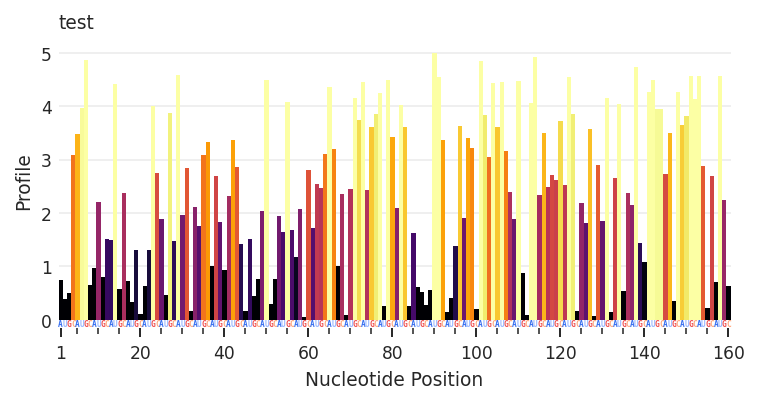

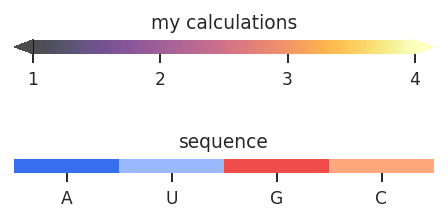

In [2]:
my_array = np.random.rand(160) * 5  # 160 random values between 0 and 5
my_sequence = "AUGC" * 40  # AUGC repeating 40 times (160 nts total)

test = rnav.Sample(
    sample="test",
    my_profile=rnav.data.Profile.from_array(
        input_data=my_array,
        sequence=my_sequence,
        metric="Profile",
        metric_defaults={
            "Profile": {
                "metric_column": "Profile",
                "title": "my calculations",
                "cmap": "inferno",
                "normalization": "min_max",
                "values": [1, 4],
                "ticks": [1, 2, 3, 4],
                "extend": "both"
            }
        }
    )
)

plot = rnav.plot_profile(
    samples=[test],
    profile="my_profile",
)

A Pandas DataFrame
------------------

DataFrames provide more flexibility than arrays of values.
These can contain any number of columns, containing per-nucleotide values and optional error rates.

This DataFrame must start with a particular structure:

- one row per nucleotide
- A "Nucleotide" column containing nucleotide positions
- A "Sequence column containing the nucleotide identities
- Any number of additional columns

Again, using an arbitrary data keyword, we can directly create and assign any RNAvigate data object.
Here I use `rnav.data.Profile` to create the profile.

`input_data` (the DataFrame) argument is required.
`metric` and `metric_defaults` allow me to customize the color representation of the data and the associated colorbar legend.
Color representation can be defined seperately for different columns.


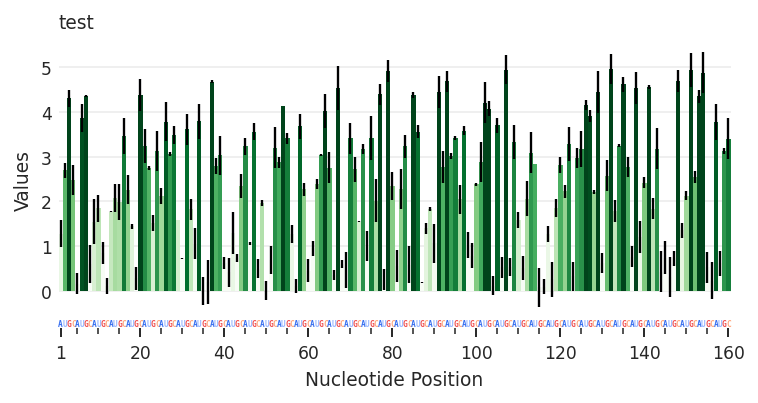

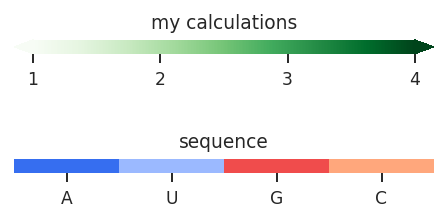

In [3]:
my_data = pd.DataFrame({
    "Nucleotide": np.arange(1, 161),  # positions 1 through 160
    "Sequence": [nt for nt in "AUGC"*40],  # AUGC repeating 40 times (160 nts total)
    "Values": np.random.rand(160) * 5,  # 160 random values between 0 and 5
    "Errors": np.random.rand(160) / 2,  # 160 random values between 0 and 0.5
    "Values_2": np.random.rand(160) * 11 // 1,  # 160 random integer values between 0 and 10
})

test = rnav.Sample(
    sample="test",
    my_profile=rnav.data.Profile(
        input_data=my_data,
        metric="Values",
        metric_defaults={
            "Values": {
                "metric_column": "Values",
                "error_column": "Errors",
                "title": "my calculations",
                "cmap": "Greens",
                "normalization": "min_max",
                "values": [1, 4],
                "ticks": [1, 2, 3, 4],
                "extend": "both",
                "alpha": 1,
            },
            "Values_2": {
                "metric_column": "Values_2",
                "error_column": None,
                "title": "my other calculations",
                "cmap": ["grey", "black", "purple", "blue", "cyan"],
                "normalization": "bins",
                "values": [2, 4, 6, 8],
                "extend": "both",
                "alpha": 1,
            }
        }
    )
)

plot = rnav.plot_profile(
    samples=[test],
    profile="my_profile",
)

Having defined how to represent "Value" and "Value_2", I can easily toggle between them by setting the metric value.

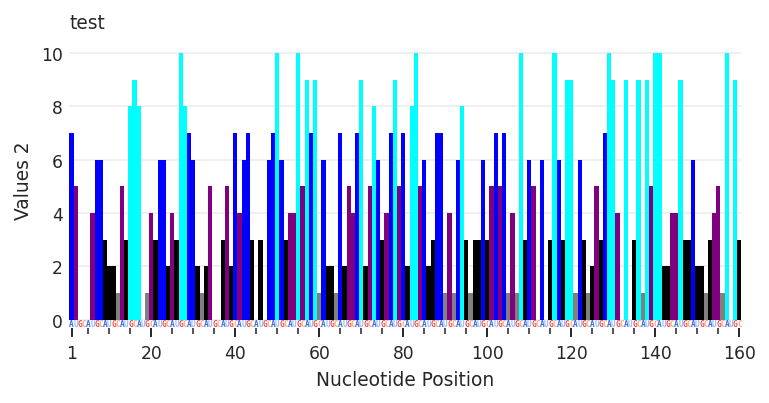

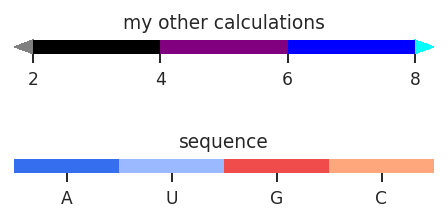

In [4]:
test.get_data("my_profile").metric = "Values_2"

plot2 = rnav.plot_profile(
    samples=[test],
    profile="my_profile",
)

A table-like data file
----------------------

Similar to the DataFrames described above, if a table-like data file follows this structure, it can be used to create a Profile directly.

- one row per nucleotide
- A column containing nucleotide positions
- A column containing the nucleotide identities
- Any number of additional columns

I haven't yet made an example file to demonstrate this section, so you just have to trust me that this works.

If we have a file with the following structure:

- a multiline header to ignore
- a 4-column comma-separated row of column names: pos, nt, x, and y
- a 4-column comma-separated table of values (1 row per nucleotide)

```
# A multiline header
# containing meta-data
pos,nt,x,y
1,A,0.5,9
...and so on
```

This file can be coerced into the expected DataFrame format:
```python
my_data = pd.read_table(
    "path/to/my_file.csv",
    sep=",",
    comment="#",
    header=0,
    names=["Nucleotide", "Sequence", "X_position", "Y_position"]
)
```

The Pandas function `pd.read_table` is a powerful method to coerce table-like files into DataFrames and has many options.
`my_data` is now a DataFrame that can be used to create a profile in the method described earlier.

RNAvigate also has a shortcut to turn this file directly into a Profile.
This is accomplished by passing the necessary `read_table` arguments through the Profile constructor.

```python
test = rnav.Sample(
    sample="test",
    my_profile=rnav.data.Profile(
        input_data="path/to/my_file.csv",
        read_table_kw={
            "sep": ",",
            "comment": "#",
            "header": 0,
            "names": ["Nucleotide", "Sequence", "X_position", "Y_position"]
        }
    )
)
```

A non-table-like data file
--------------------------

This requires the use of Pandas to coerce the file into a suitable DataFrame.
There are too many possibilities here for me to cover, so I will just suggest a few Google searches to get you started:

- Google: "pandas IO tools" Pandas has built-in tools to read CSV, Fixed-width, JSON, HTML, XML, Excel, and many others.
- Google: "how do I turn _ into a pandas dataframe" There is probably a good stack overflow answer out there.
